In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
#import plotly.express as px

In [2]:
file = 'df2clustering.csv'
df = pd.read_csv(file, index_col=0)
df

,Revenue_T,Category,ManufacturerID_x,IsCompete,MonthNo,Year,City,State,cluster
Units,,,,,,,,,
12,31676.40,Urban,8,No,12,2014,"Newington, CT",CT,3
7,11020.59,Rural,10,No,12,2014,"Corona, CA",CA,7
7,11020.59,Rural,10,No,12,2014,"Corona, CA",CA,7
3,35010.36,Urban,7,Yes,12,2014,"Melbourne, FL",FL,9
3,16441.11,Rural,4,No,12,2014,"Saint George, UT",UT,9
...,...,...,...,...,...,...,...,...,...
1,5291.37,Urban,8,No,4,2002,"Islip Terrace, NY",NY,0
1,5291.37,Urban,8,No,4,2002,"Waynesboro, MS",MS,0
1,6614.37,Urban,14,No,4,2002,"Bremerton, WA",WA,12


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 12 to 1
Data columns (total 9 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Revenue_T         1048534 non-null  float64
 1   Category          1048575 non-null  object 
 2   ManufacturerID_x  1048575 non-null  int64  
 3   IsCompete         1048575 non-null  object 
 4   MonthNo           1048575 non-null  int64  
 5   Year              1048575 non-null  int64  
 6   City              1048575 non-null  object 
 7   State             1048575 non-null  object 
 8   cluster           1048575 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 80.0+ MB


/tmp/ipykernel_95/3319144533.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(),


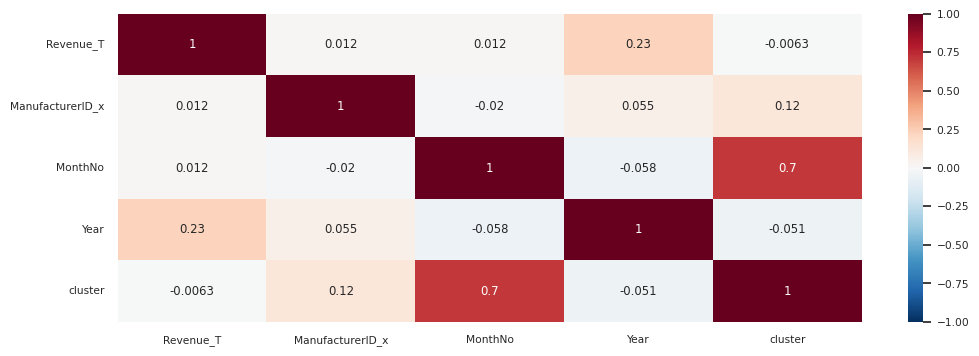

In [4]:
sns.set(font_scale=0.7)
plt.figure(figsize=(12,4))
sns.heatmap(
    df.corr(),
    cmap='RdBu_r', # задаёт цветовую схему
    annot=True, # рисует значения внутри ячеек
    vmin=-1, vmax=1); # указывает начало цветовых кодов от -1 до 1.

KeyboardInterrupt: 

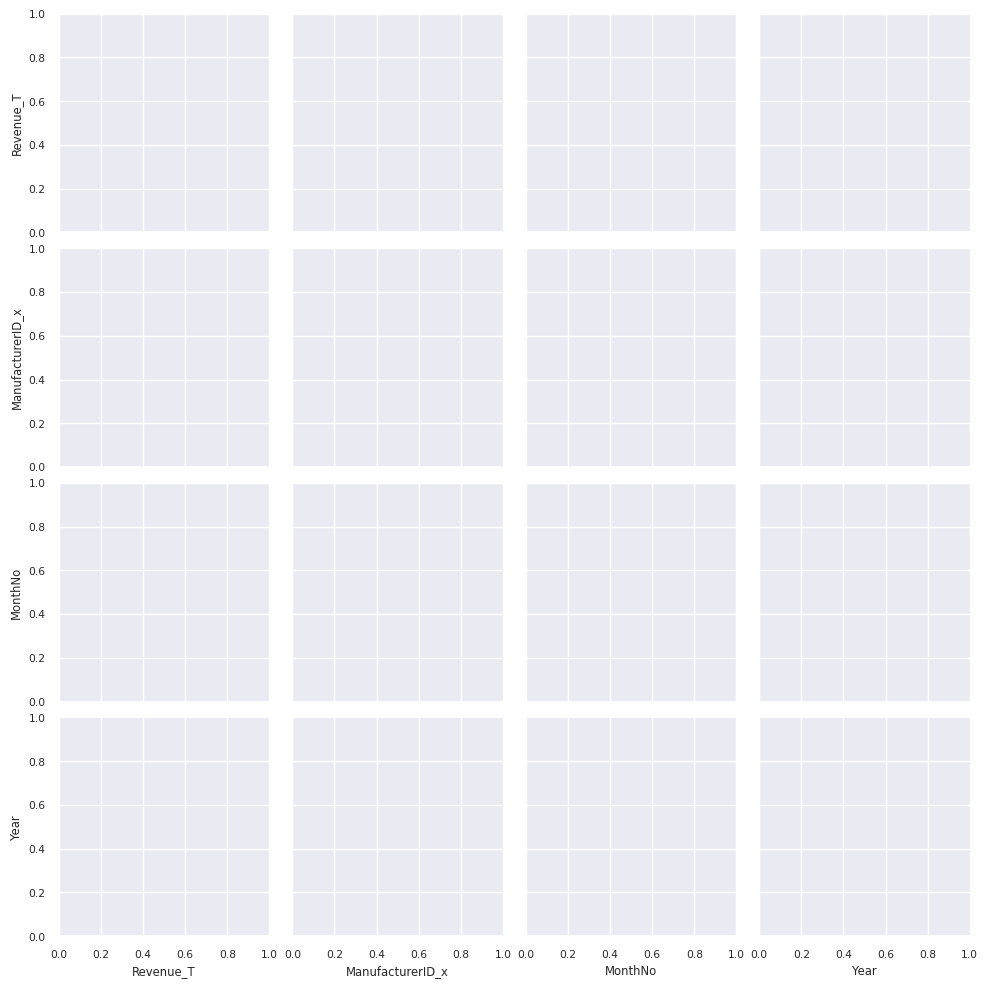

In [5]:
sns.pairplot(df, hue='cluster')